In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
csv_path = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
data = pd.read_csv(csv_path)


data.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
column_names = [
    "Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", 
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", 
    "Credit_History", "Property_Area", "Loan_Status"
]

data = pd.read_csv(csv_path, names=column_names, header=0)


data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
data = data.drop(columns='Loan_ID')

In [5]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,600,610,598,613,581,613.000000,613.000000,592.000000,599.000000,563.000000,613,613
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,488,398,344,479,499,NaN,NaN,NaN,NaN,NaN,233,421
mean,NaN,NaN,NaN,NaN,NaN,5402.732463,1623.890571,146.412162,341.969950,0.841918,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6114.004114,2927.903583,85.587325,65.170672,0.365142,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2876.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.000000,1210.000000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5780.000000,2302.000000,168.000000,360.000000,1.000000,NaN,NaN


In [6]:
missing_values = data.isnull().sum()

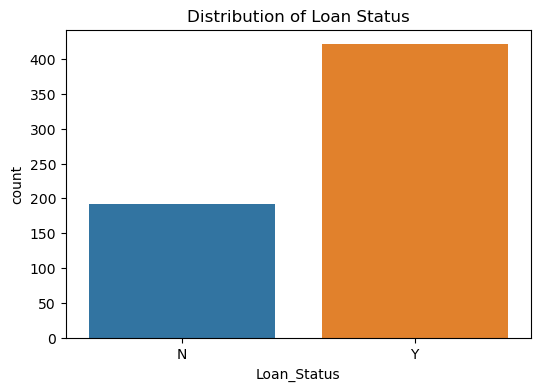

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Loan_Status')
plt.title('Distribution of Loan Status')
plt.show()

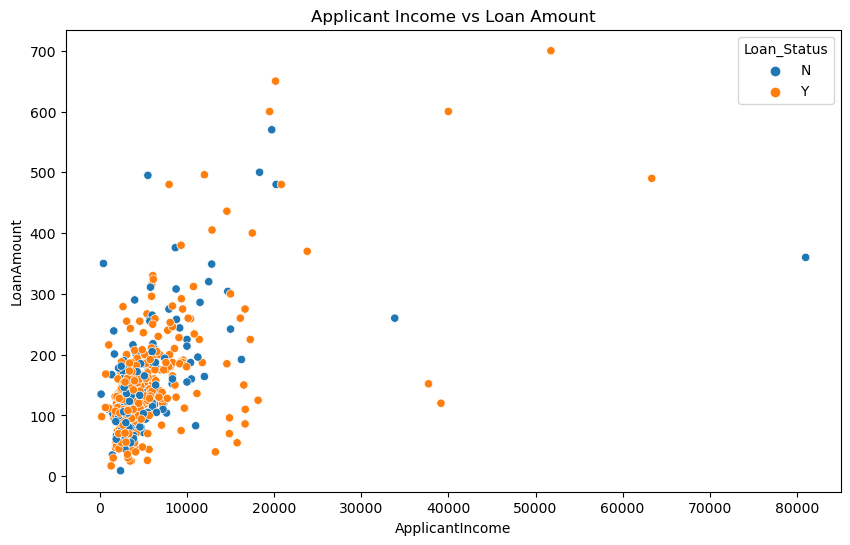

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')
plt.title('Applicant Income vs Loan Amount')
plt.show()


In [9]:
missing_values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
imputer = SimpleImputer(strategy='mean')
data['LoanAmount']=imputer.fit_transform(data[['LoanAmount']])
data['Loan_Amount_Term'] = imputer.fit_transform(data[['Loan_Amount_Term']])
data['Credit_History'] = imputer.fit_transform(data[['Credit_History']])

In [11]:
for column in ['Gender','Married','Dependents','Self_Employed']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [12]:
data['Dependents'] = data['Dependents'].replace('3+', 3)

In [13]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

In [14]:
label_encoder = LabelEncoder()
for column in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    data[column] = label_encoder.fit_transform(data[column])

In [15]:
X = data.drop(columns='Loan_Status')
y = data['Loan_Status']

In [16]:
scaler = StandardScaler()
X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(
    X[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# y_pred_log_reg = log_reg.predict(X_test)
# accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [19]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)

accuracy_log_reg, accuracy_rf_clf

(0.8130081300813008, 0.7804878048780488)